visual evaluation of models

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [1]:
import numpy  as np
import cv2
import numpy as np
from matplotlib import pyplot as plt
import rasterio
from rasterio import plot
from osgeo import gdal
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [107]:
raster = np.load('Test_Raster.npy')
mask = np.load('Test_Mask.npy')

In [108]:
mask.shape

(9, 10240, 10240, 1)

In [109]:
def make_256_tiles(raster,mask):
    i = 0
    j = 0
    i_pixel = 0
    länge = raster.shape[1]
    bilder = []
    mbilder = []
    overlap = 256
    patches = raster.shape[0]
    for l in range(0,patches):
        i=0
        i_pixel=0
        while ((i_pixel+256) <= länge):
            j = 0
            j_pixel = 0
            höhe = raster.shape[2]
            while ((j_pixel+256) <= höhe):
                bild = raster[l,i_pixel:(i_pixel)+256, j_pixel:(j_pixel)+256,:]
                mbild = mask[l,i_pixel:(i_pixel)+256, j_pixel:(j_pixel)+256,:]
                bild = bild.reshape(256,256,3)
                mbild = mbild.reshape(256,256,1)


                bilder.append(bild)
                mbilder.append(mbild)
                j = j+1
                j_pixel = j*overlap
            i = i+1
            i_pixel = i*overlap
    bilder = np.array(bilder)
    mbilder = np.array(mbilder)
    return bilder, mbilder
raster256, mask256 = make_256_tiles(raster,mask)

In [132]:
mask256.shape


(14400, 256, 256, 1)

In [134]:
raster256 = raster256/255

In [13]:
def get_only_solar(raster,mask):
    solar_raster = []
    solar_mask = []
    for i in range(0,mask.shape[0]):
        if (np.amax(mask[i]) == 1):
            solar_raster.append(raster[i])
            solar_mask.append(mask[i])
    soalr_raster = np.asarray(solar_raster)
    soalr_mask = np.asarray(solar_mask)
    return soalr_raster, soalr_mask


In [14]:
sol_rast, sol_mask = get_only_solar(raster256, mask256)

In [32]:
np.save('test_solar_raster',sol_rast)
np.save('test_solar_mask', sol_mask)

In [2]:
sol_rast = np.load('test_solar_raster.npy')
sol_mask = np.load('test_solar_mask.npy')

In [4]:
sol_mask.shape

(160, 256, 256, 1)

In [63]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'BCE Prediction', 'Dice Prediction', 'IoU Prediction', 'Tversky Prediction', 'Big IoU Prediction']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [22]:
model = keras.models.load_model('model/UNet_small_DiceLoss_Oversampling_Vers.6_', compile=False)

In [57]:
models = ['model/UNet_small_BCE_Oversampling_Vers.8_', 'model/UNet_small_DiceLoss_Oversampling_Vers.7_', 'model/UNet_small_IoULoss_Oversampling_Vers.6_', 'model/UNet_small_TverskyLoss_07_03_Oversampling_Vers.6_', ]
model = keras.models.load_model(models[0], compile=False)
model2 = keras.models.load_model(models[1], compile=False)
model3 = keras.models.load_model(models[2], compile=False)
model4 = keras.models.load_model(models[3], compile=False)

In [56]:
def show_prediction_each_model1(sol_rast, sol_mask, index):
    display_list = [sol_rast[index],sol_mask[index]]
    
    models = ['checkpoint/UNet_small_BCE_Oversampling_Vers.8_', 'checkpoint/UNet_small_DiceLoss_Oversampling_Vers.7_','checkpoint/UNet_small_IoULoss_Oversampling_Vers.6_','checkpoint/UNet_small_TverskyLoss_07_03_Oversampling_Vers.6_' ]
    for model_weights in models:
        model.load_weights(model_weights)
        predictions = model.predict(sol_rast[index].reshape(1,256,256,3))
        display_list.append(predictions.reshape(256,256,1))
    display(display_list)

In [64]:
def show_prediction_each_model(sol_rast, sol_mask, index):
    #display_list = [sol_rast[index],sol_mask[index]]
    
#     models = ['model/UNet_small_BCE_Oversampling_Vers.8_', 'model/UNet_small_DiceLoss_Oversampling_Vers.7_', 'model/UNet_small_IoULoss_Oversampling_Vers.6_', 'model/UNet_small_TverskyLoss_07_03_Oversampling_Vers.6_', ]
#     model = keras.models.load_model(model, compile=False)
    pred1 = model1.predict(sol_rast[index].reshape(1,256,256,3))
    pred2 = model2.predict(sol_rast[index].reshape(1,256,256,3))
    pred3 = model3.predict(sol_rast[index].reshape(1,256,256,3))
    pred4 = model4.predict(sol_rast[index].reshape(1,256,256,3))
    pred5 = model5.predict(sol_rast[index].reshape(1,256,256,3))
    #display_list.append(predictions.reshape(256,256,1))
    display([sol_rast[index],sol_mask[index], pred1.reshape(256,256,1), pred2.reshape(256,256,1), pred3.reshape(256,256,1), pred4.reshape(256,256,1), pred5.reshape(256,256,1)])

850


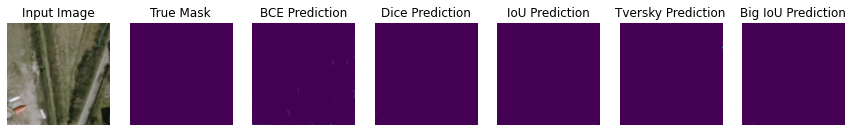

851


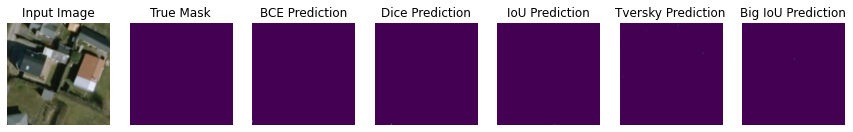

852


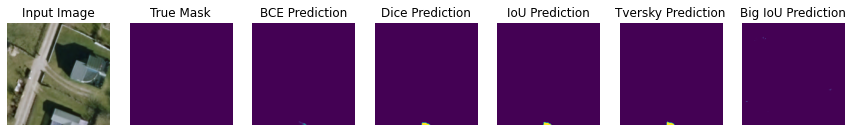

853


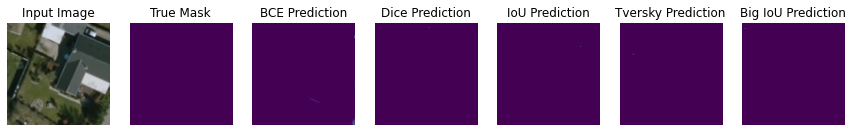

854


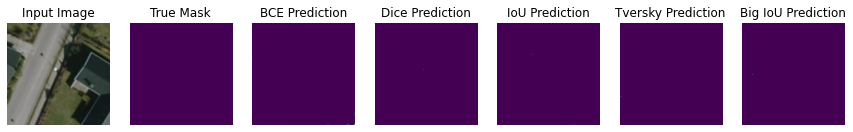

855


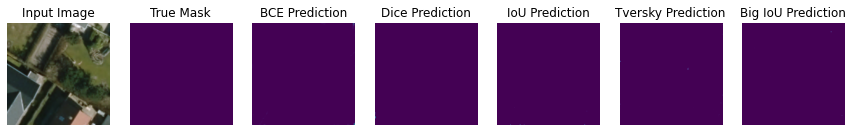

856


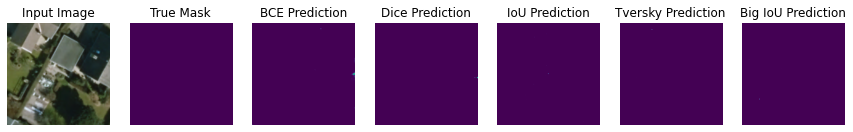

857


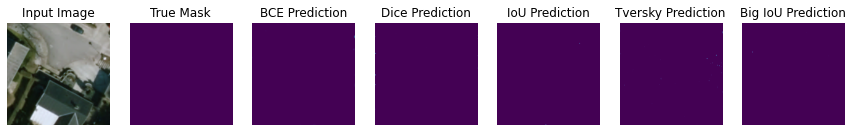

858


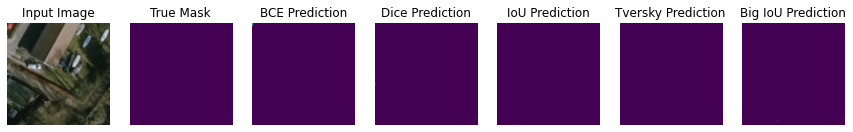

859


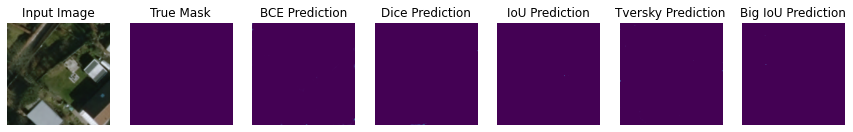

In [143]:
x=850
for i in range(x,x+10):
    print (str(i))
    show_prediction_each_model(raster256, mask256, i)

In [3]:
notable_solars = [0,1,2,4,6,7,8,9,11,12,13,14,15,17,18,19,20,23,26,27,29,31,32,34,37,38,45,46,48,50,55,56,57,59,63,66,67,71,82,84,86,87,91,92,93,95,96,97,98,99,100,101,102,104,107,109,110,112,115,118,119,120,122,123,124,125,127,128,129,130,134,145,149,152,153,155,156,159]

In [261]:
len(notable_solars)

78

In [ ]:
nicht_gut_gelabelt = [135] 

In [26]:
models = keras.models.load_model('model/UNet_small_IoULoss_Oversampling_Vers.6_', compile=False)
models.load_weights('checkpoint/UNet_small_IoULoss_Oversampling_Vers.6_')
modelb = keras.models.load_model('model/UNet_big_IoULoss_Oversampling_Vers.1_', compile=False)

In [32]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Small IoU Prediction', 'Big IoU Prediction']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

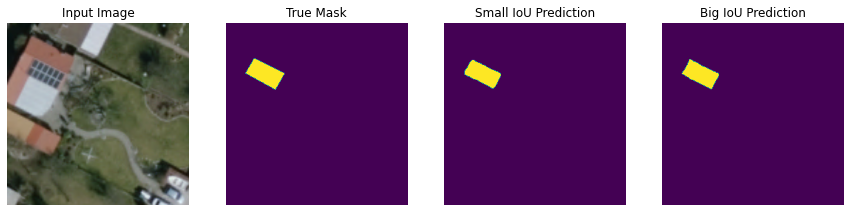

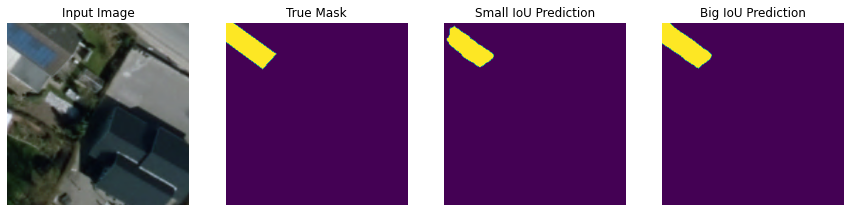

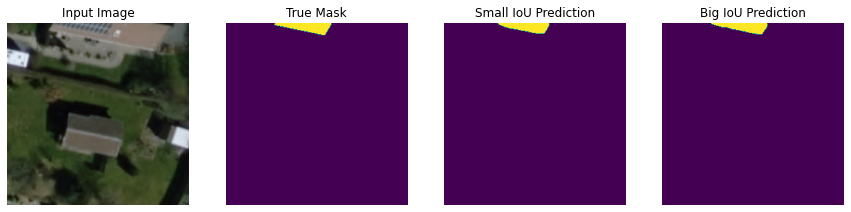

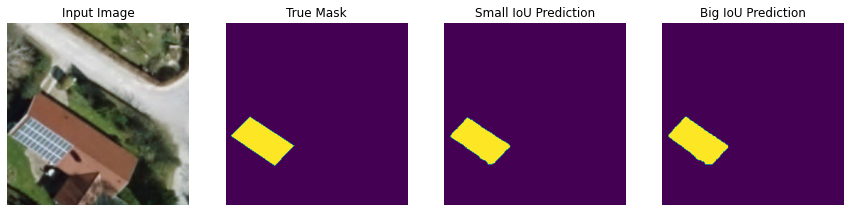

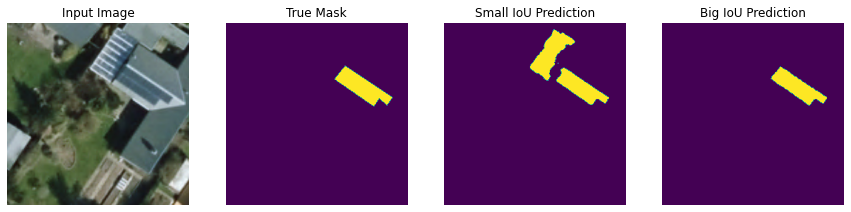

In [33]:
x=70
for i in range(x,x+5):
    c = notable_solars[i]
    pred_small = models.predict(sol_rast[c].reshape(1,256,256,3))
    pred_big   = modelb.predict(sol_rast[c].reshape(1,256,256,3))
    display([sol_rast[c], sol_mask[c], pred_small.reshape(256,256,1), pred_big.reshape(256,256,1)])

In [ ]:
X_tb = np.load('saved_data/Data_new/Tensorboard/X.npy')
y_tb = np.load('saved_data/Data_new/Tensorboard/y.npy') 

In [37]:

model1 = keras.models.load_model('model/UNet_small_BCE_Oversampling_Vers.8_', compile=False)
model1.load_weights('checkpoint/UNet_small_BCE_Oversampling_Vers.8_')
model2 = keras.models.load_model('model/UNet_small_DiceLoss_Oversampling_Vers.7_', compile=False)
model2.load_weights('checkpoint/UNet_small_DiceLoss_Oversampling_Vers.7_')
model3 = keras.models.load_model('model/UNet_small_IoULoss_Oversampling_Vers.6_', compile=False)
model3.load_weights('checkpoint/UNet_small_IoULoss_Oversampling_Vers.6_')
model4 = keras.models.load_model('model/UNet_small_TverskyLoss_07_03_Oversampling_Vers.6_', compile=False)
model4.load_weights('checkpoint/UNet_small_TverskyLoss_07_03_Oversampling_Vers.6_')
model5 = keras.models.load_model('model/UNet_big_IoULoss_Oversampling_Vers.1_', compile=False)

In [47]:
def save_predictions_for_thesis(sol_rast, sol_mask, index, folder, i):
    #display_list = [sol_rast[index],sol_mask[index]]
    
#     models = ['model/UNet_small_BCE_Oversampling_Vers.8_', 'model/UNet_small_DiceLoss_Oversampling_Vers.7_', 'model/UNet_small_IoULoss_Oversampling_Vers.6_', 'model/UNet_small_TverskyLoss_07_03_Oversampling_Vers.6_', ]
#     model = keras.models.load_model(model, compile=False)
    pred1 = model1.predict(sol_rast[index].reshape(1,256,256,3))
    pred2 = model2.predict(sol_rast[index].reshape(1,256,256,3))
    pred3 = model3.predict(sol_rast[index].reshape(1,256,256,3))
    pred4 = model4.predict(sol_rast[index].reshape(1,256,256,3))
    pred5 = model5.predict(sol_rast[index].reshape(1,256,256,3))
    #display_list.append(predictions.reshape(256,256,1))
    save_pred([sol_rast[index],sol_mask[index], pred1.reshape(256,256,1), pred2.reshape(256,256,1), pred3.reshape(256,256,1), pred4.reshape(256,256,1), pred5.reshape(256,256,1)], folder, i)

In [53]:
def save_pred(display_list, folder, index):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'BCE Prediction', 'Dice Prediction', 'IoU Prediction', 'Tversky Prediction', 'Big IoU Prediction']

    for i in range(len(display_list)):
        plt.figure(figsize=(15, 15))
        #plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
        plt.savefig('preds/' + folder + '/' + str(index) + '/'+ title[i]  +'.png')
        plt.show()

In [41]:
sol_rast.shape

(160, 256, 256, 3)

<Figure size 1080x1080 with 0 Axes>

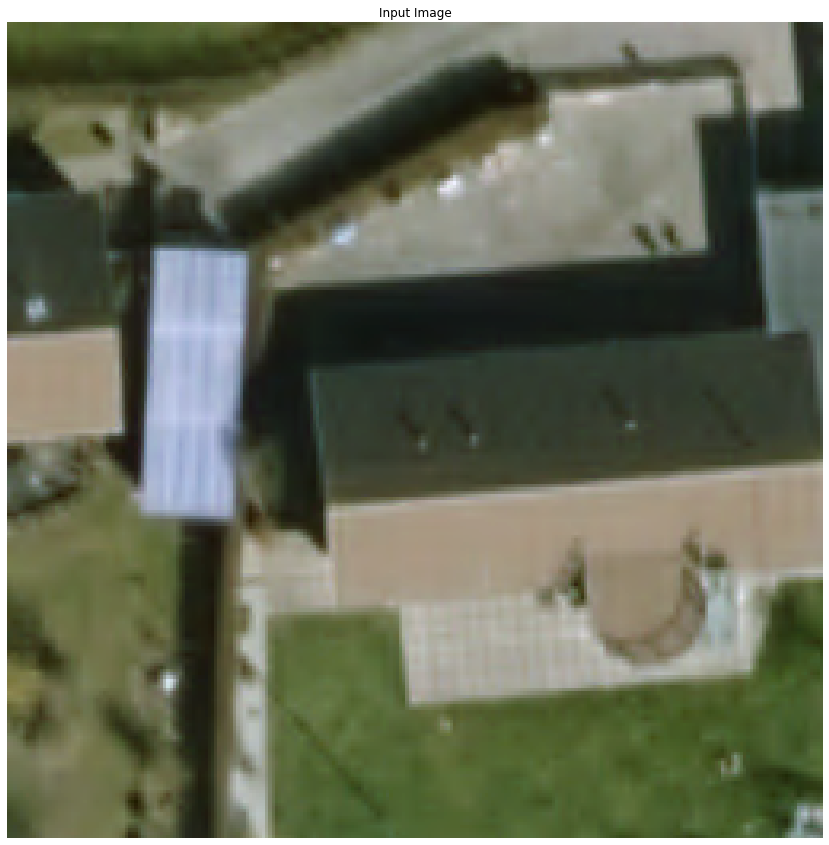

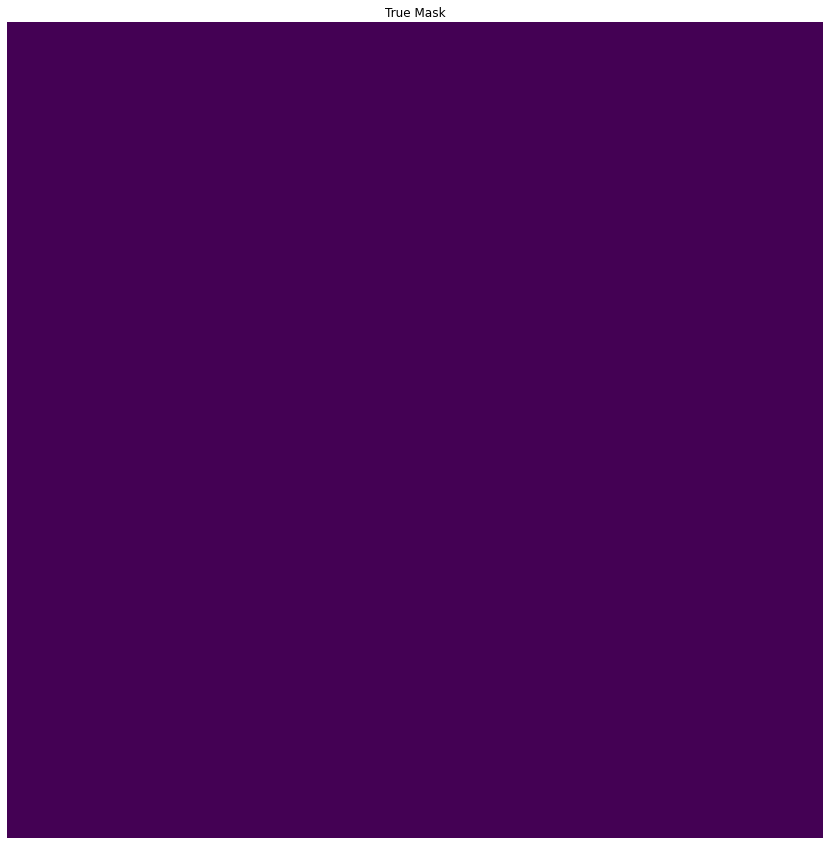

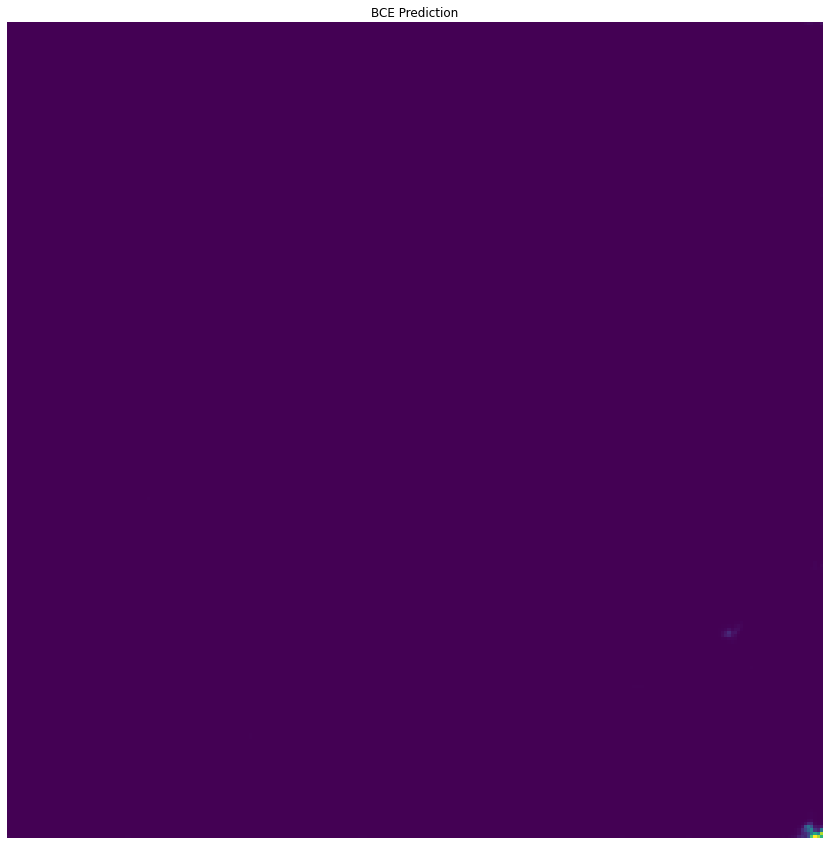

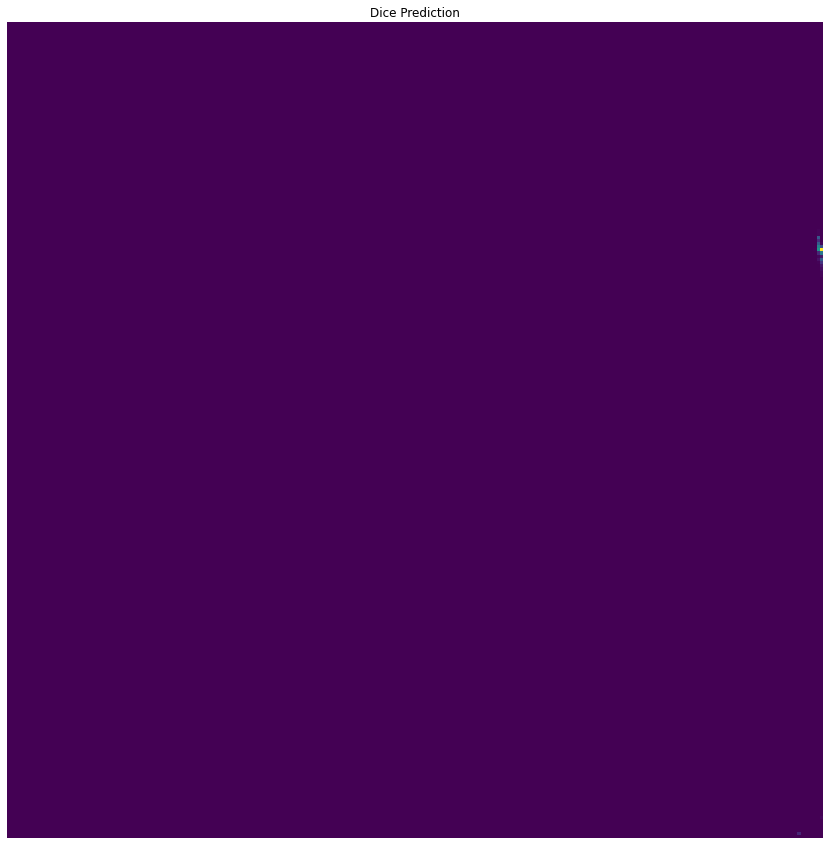

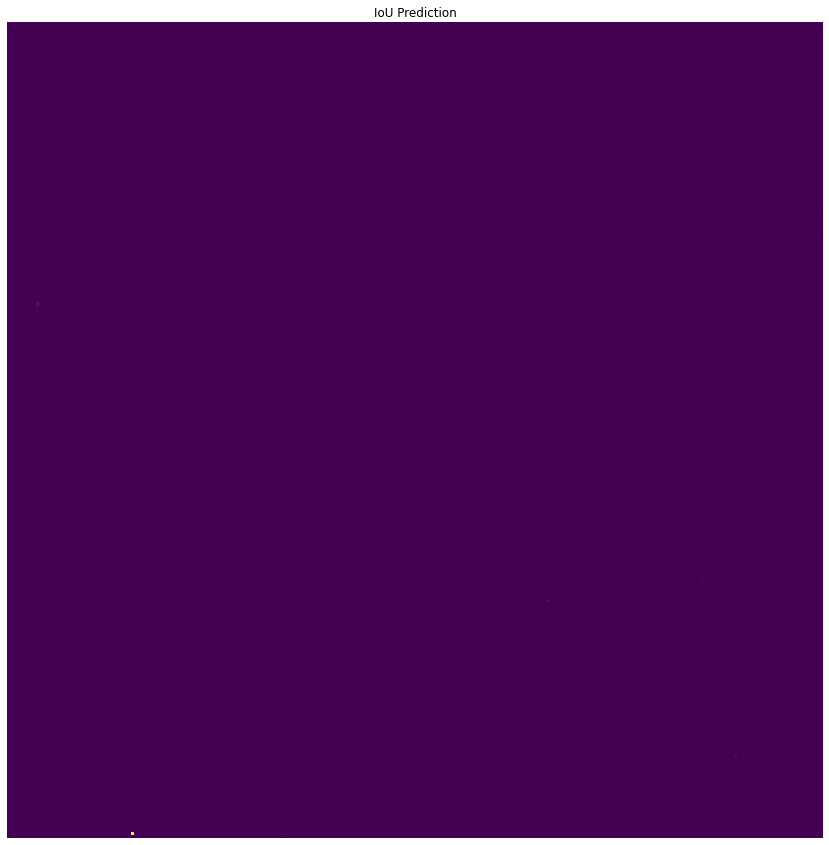

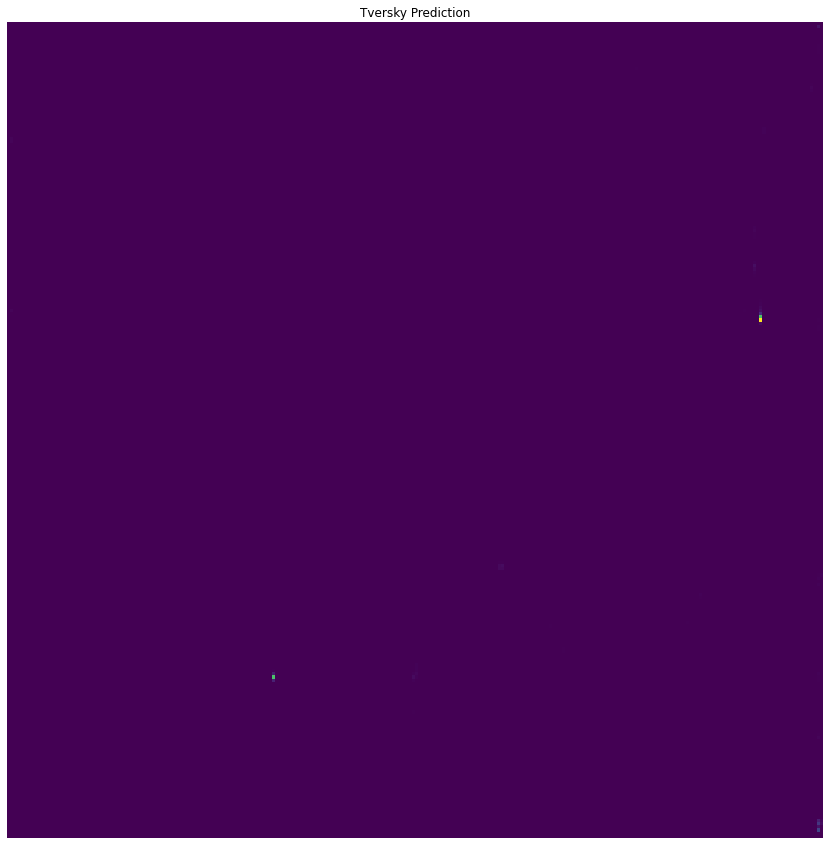

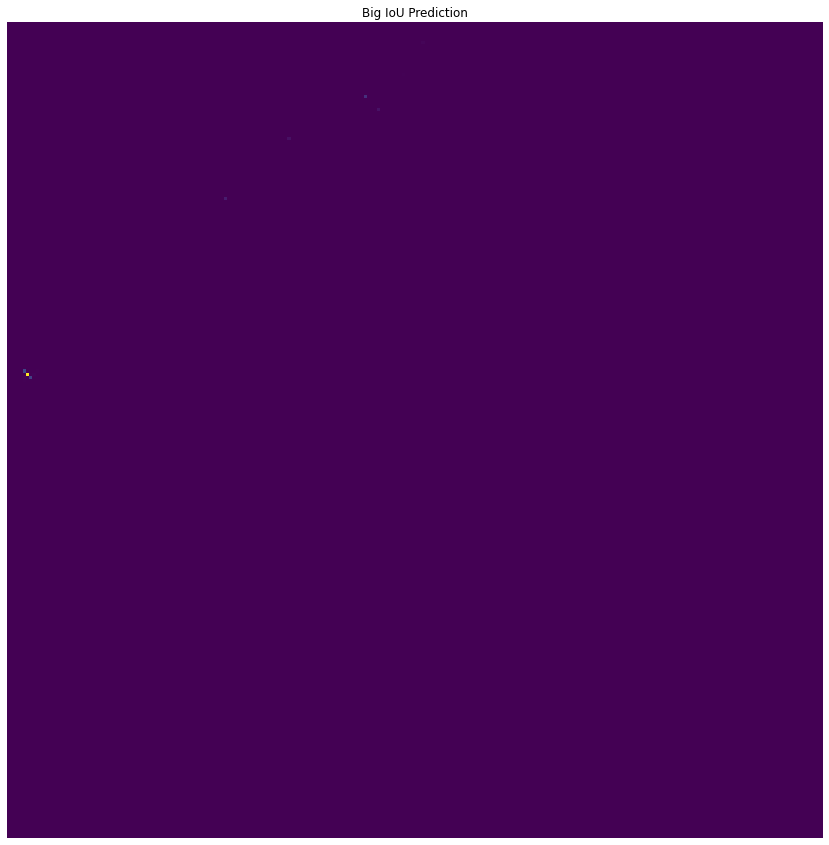

In [146]:
save_predictions_for_thesis(raster256, mask256, 530,  'noPV' ,1)